In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞
df_pitcher = pd.read_csv("Ìà¨Ïàò_Îç∞Ïù¥ÌÑ∞_ÏµúÏ¢Ö.csv")


df_pitcher['K/9'] = df_pitcher['ÌÉàÏÇºÏßÑ']/df_pitcher['Ïù¥ÎãùÏàò']*9
df_pitcher['BB/9'] = df_pitcher['ÏÇ¨ÏÇ¨Íµ¨']/df_pitcher['Ïù¥ÎãùÏàò']*9



era_stats = df_pitcher.groupby('ÏÑ†ÏàòÎ™Ö').agg({
    'ÏûêÏ±ÖÏ†ê': 'sum',
    'Ïù¥ÎãùÏàò': 'sum'
}).reset_index()

# ERA* Í≥ÑÏÇ∞
era_stats['ERA*'] = (era_stats['ÏûêÏ±ÖÏ†ê'] / era_stats['Ïù¥ÎãùÏàò']) * 9

# ERA*Î•º df_trainÏóê Î≥ëÌï©
df_pitcher = pd.merge(df_pitcher, era_stats[['ÏÑ†ÏàòÎ™Ö', 'ERA*']], on='ÏÑ†ÏàòÎ™Ö', how='left')

In [2]:
#df_train.to_csv('Ìà¨Ïàò_Îç∞Ïù¥ÌÑ∞_ÏµúÏ¢Ö_', index = False)

In [3]:
df_train = df_pitcher[~((df_pitcher['Íµ¨Î∂Ñ'] == 'FA 1ÎÖÑÏ∞®') & (df_pitcher['nÏ∞®'] == 0))]

## Íµ¨Ïõê Ìà¨ÏàòÎ°ú ÌïÑÌÑ∞ÎßÅ

In [4]:
# 1. df_trainÏóêÏÑú ÏÑ†ÏàòÎ≥Ñ ÌèâÍ∑† 'Íµ¨Ïõê Ïù¥Îãù' Í≥ÑÏÇ∞
relief_pitcher_stats = df_train.groupby('ÏÑ†ÏàòÎ™Ö')['Íµ¨Ïõê Ïù¥Îãù'].mean()

# 2. ÌèâÍ∑† 'Íµ¨Ïõê Ïù¥Îãù'Ïù¥ 28Î≥¥Îã§ ÌÅ∞ ÏÑ†ÏàòÎì§Ïùò Ïù¥Î¶ÑÎßå Ï∂îÏ∂ú
relief_pitcher_names = relief_pitcher_stats[relief_pitcher_stats > 28].index

print(f"Ï¥ù {len(relief_pitcher_names)}Î™ÖÏùò Íµ¨Ïõê Ìà¨ÏàòÍ∞Ä ÌôïÏù∏ÎêòÏóàÏäµÎãàÎã§.")
print(list(relief_pitcher_names))


# 3. Ïù¥Ï†ÑÏóê ÏßëÍ≥ÑÎêú ÏµúÏ¢Ö df_trainÏóêÏÑú Ìï¥Îãπ ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
df_relief = df_train[df_train['ÏÑ†ÏàòÎ™Ö'].isin(relief_pitcher_names)].copy()

print("\n--- Íµ¨Ïõê Ìà¨ÏàòÎßå ÌïÑÌÑ∞ÎßÅÎêú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ---")
print(df_relief.head())

Ï¥ù 40Î™ÖÏùò Íµ¨Ïõê Ìà¨ÏàòÍ∞Ä ÌôïÏù∏ÎêòÏóàÏäµÎãàÎã§.
['Í∞ïÏòÅÏãù(1Ï∞®)', 'Í≥†Ìö®Ï§Ä(1Ï∞®)', 'Í∂åÏò§Ï§Ä(1Ï∞®)', 'Í∂åÌòÅ(1Ï∞®)', 'ÍπÄÎåÄÏö∞(1Ï∞®)', 'ÍπÄÏÇ¨Ïú®(1Ï∞®)', 'ÍπÄÏÉÅÏàò(1Ï∞®)', 'ÍπÄÏÉÅÏàò(2Ï∞®)', 'ÍπÄÏäπÌöå(1Ï∞®)', 'ÍπÄÏû¨Ïú§(1Ï∞®)', 'ÍπÄÏßÑÏÑ±(1Ï∞®)', 'ÎßàÏùºÏòÅ(1Ï∞®)', 'ÎßàÏ†ïÍ∏∏(1Ï∞®)', 'Î∞ïÏ†ïÏßÑ(1Ï∞®)', 'Î¥âÏ§ëÍ∑º(1Ï∞®)', 'ÏÜêÏäπÎùΩ(1Ï∞®)', 'ÏÜ°ÏùÄÎ≤î(2Ï∞®)', 'Ïã¨ÏàòÏ∞Ω(1Ï∞®)', 'ÏïàÏßÄÎßå(1Ï∞®)', 'Ïò§ÏäπÌôò(2Ï∞®)', 'Ïò§Ï£ºÏõê(1Ï∞®)', 'Ïö∞Í∑úÎØº(2Ï∞®)', 'ÏõêÏ¢ÖÌòÑ(1Ï∞®)', 'Ïú†ÎèôÌõà(1Ï∞®)', 'Ïú§Í∏∏ÌòÑ(1Ï∞®)', 'Ïù¥ÎèôÌòÑ(1Ï∞®)', 'Ïù¥Î≥¥Í∑º(1Ï∞®)', 'Ïù¥Ïû¨ÏòÅ(1Ï∞®)', 'Ïù¥Ï†ïÌõà(1Ï∞®)', 'Ïù¥ÌÉúÏñë(1Ï∞®)', 'Ïù¥ÌòÑÏäπ(1Ï∞®)', 'ÏûÑÏ∞ΩÎØº(1Ï∞®)', 'Ï†ïÏö∞Îûå(1Ï∞®)', 'Ï†ïÏö∞Îûå(2Ï∞®)', 'Ï†ïÌòÑÏö±(1Ï∞®)', 'Ï£ºÍ∂å(1Ï∞®)', 'ÏßÑÌï¥Ïàò(1Ï∞®)', 'Ï∞®Ïö∞Ï∞¨(1Ï∞®)', 'Ï±ÑÎ≥ëÏö©(1Ï∞®)', 'ÌôçÍ±¥Ìù¨(1Ï∞®)']

--- Íµ¨Ïõê Ìà¨ÏàòÎßå ÌïÑÌÑ∞ÎßÅÎêú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ---
   FAÎÖÑÎèÑ  Íµ¨Îã®Î™Ö      ÏÑ†ÏàòÎ™Ö ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò   Ìà¨    Íµ¨Î∂Ñ FAÎì±Í∏â  ÌîåÎ†àÏù¥ÎÖÑÎèÑ  ÎÇòÏù¥  Í≤åÏûÑÏàò  ...  Íµ≠ÎåÄÏ∂úÏ†ÑÌö

In [5]:
# Í∑πÎã®ÏπòÍ∞Ä ÎßéÏïÑ Î∂ÑÎ•òÏóê ÌòºÏÑ†ÏùÑ Ï£ºÎäî'Ï∞®Ïö∞Ï∞¨(1Ï∞®)' ,'Í∂åÏò§Ï§Ä(1Ï∞®)', 'Ïú§Í∏∏ÌòÑ(1Ï∞®)' Î°úÏö∞Î•º Î∂ÑÏÑùÏóêÏÑú  Ï†úÏô∏
df_relief = df_relief[df_relief['ÏÑ†ÏàòÎ™Ö'] != 'Í∂åÏò§Ï§Ä(1Ï∞®)']
df_relief = df_relief[df_relief['ÏÑ†ÏàòÎ™Ö'] != 'Ï∞®Ïö∞Ï∞¨(1Ï∞®)']
df_relief = df_relief[df_relief['ÏÑ†ÏàòÎ™Ö'] != 'Ïú§Í∏∏ÌòÑ(1Ï∞®)']
# 1. FA Í≥ÑÏïΩ Ï†ïÎ≥¥ Ï≤òÎ¶¨ (0Ïù¥ ÏïÑÎãå Í∞íÏù¥ ÏûàÏúºÎ©¥ Í∑∏Í±∏Î°ú ÎåÄÏ≤¥)
def fill_fa_info(x):
    years = x['FA Í≥ÑÏïΩ Ïó∞Ïàò']
    total = x['FA Í≥ÑÏïΩ Ï¥ùÏï°']
    
    fa_years = years[years != 0]
    fa_total = total[total != 0]

    return pd.Series({
        'FA Í≥ÑÏïΩ Ïó∞Ïàò': fa_years.iloc[0] if not fa_years.empty else 0,
        'FA Í≥ÑÏïΩ Ï¥ùÏï°': fa_total.iloc[0] if not fa_total.empty else 0
    })

fa_info = df_relief.groupby('ÏÑ†ÏàòÎ™Ö').apply(fill_fa_info).reset_index()

# 2. ÏÑ±Í≥º ÏßÄÌëú ÌèâÍ∑† Ï≤òÎ¶¨
performance_cols = ['Ï¢ÖÌï© WAR', 'ERA*', 'Ïù¥ÎãùÏàò', 'Ìà¨Íµ¨Ïàò','ÏÑ†Î∞ú Ïù¥Îãù','Íµ¨Ïõê Ïù¥Îãù','ÎÇòÏù¥']  # ÌèâÍ∑† ÎÇº Ïª¨ÎüºÎì§Î°ú ÏàòÏ†ï

performance_avg = df_relief.groupby('ÏÑ†ÏàòÎ™Ö')[performance_cols].mean().reset_index()

# 3. ÌèâÍ∑† ÎÇ¥ÏßÄ ÏïäÎäî Ïª¨Îüº(Î¨∏ÏûêÏó¥ Îì±) Ï≤òÎ¶¨ ‚Üí Ï≤´ Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
extra_cols = ['K/9', 'BB/9', 'FIP','ÌîºÏû•ÌÉÄÏú®' ]  # Ï∂îÍ∞ÄÌïòÍ≥† Ïã∂ÏùÄ Ïª¨Îüº
extra_info = df_relief.groupby('ÏÑ†ÏàòÎ™Ö')[extra_cols].last().reset_index()

# 4. Î≥ëÌï©
df = (
    performance_avg
    .merge(fa_info, on='ÏÑ†ÏàòÎ™Ö', how='left')
    .merge(extra_info, on='ÏÑ†ÏàòÎ™Ö', how='left')
)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5820\2139709182.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fa_info = df_relief.groupby('ÏÑ†ÏàòÎ™Ö').apply(fill_fa_info).reset_index()


In [6]:
df.isna().sum()

ÏÑ†ÏàòÎ™Ö         0
Ï¢ÖÌï© WAR      0
ERA*        0
Ïù¥ÎãùÏàò         0
Ìà¨Íµ¨Ïàò         0
ÏÑ†Î∞ú Ïù¥Îãù       0
Íµ¨Ïõê Ïù¥Îãù       0
ÎÇòÏù¥          0
FA Í≥ÑÏïΩ Ïó∞Ïàò    0
FA Í≥ÑÏïΩ Ï¥ùÏï°    0
K/9         0
BB/9        0
FIP         0
ÌîºÏû•ÌÉÄÏú®        0
dtype: int64

## Ï†ÅÏ†àÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞

C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

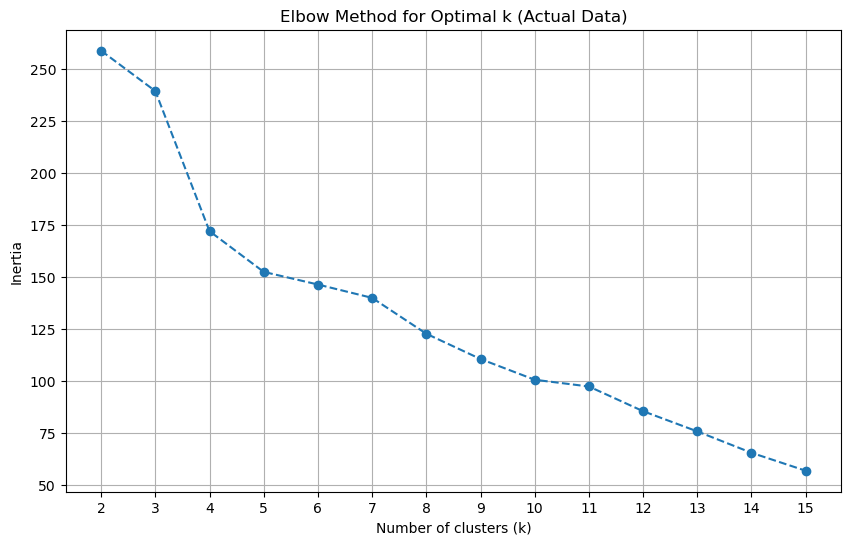

In [7]:

# Ïä§ÏºÄÏùºÎßÅ + ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
features = ['Ï¢ÖÌï© WAR','ERA*', 'Ïù¥ÎãùÏàò', 'Ìà¨Íµ¨Ïàò',
       'K/9', 'BB/9', 'FIP','ÎÇòÏù¥','ÌîºÏû•ÌÉÄÏú®']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

inertia = []
K_range = range(2, 16) # kÎ•º 2Î∂ÄÌÑ∞ 15ÍπåÏßÄ ÌÖåÏä§Ìä∏

for k in K_range:
    # n_init='auto'Î°ú ÏÑ§Ï†ïÌïòÏó¨ Í≤ΩÍ≥† Î©îÏãúÏßÄÍ∞Ä Îú®ÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Actual Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()



## Ï†ÅÏ†àÌïú PCA Ïàò Ï∞æÍ∏∞

--- [Íµ¨Ïõê Ìà¨Ïàò] Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ Î∞è ÎàÑÏ†Å Î∂ÑÏÇ∞ ---
     Explained Variance  Cumulative Variance
PC1            0.320823             0.320823
PC2            0.290462             0.611285
PC3            0.126890             0.738175
PC4            0.109243             0.847419
PC5            0.077081             0.924500
PC6            0.046659             0.971159
PC7            0.014579             0.985737
PC8            0.012042             0.997780
PC9            0.002220             1.000000


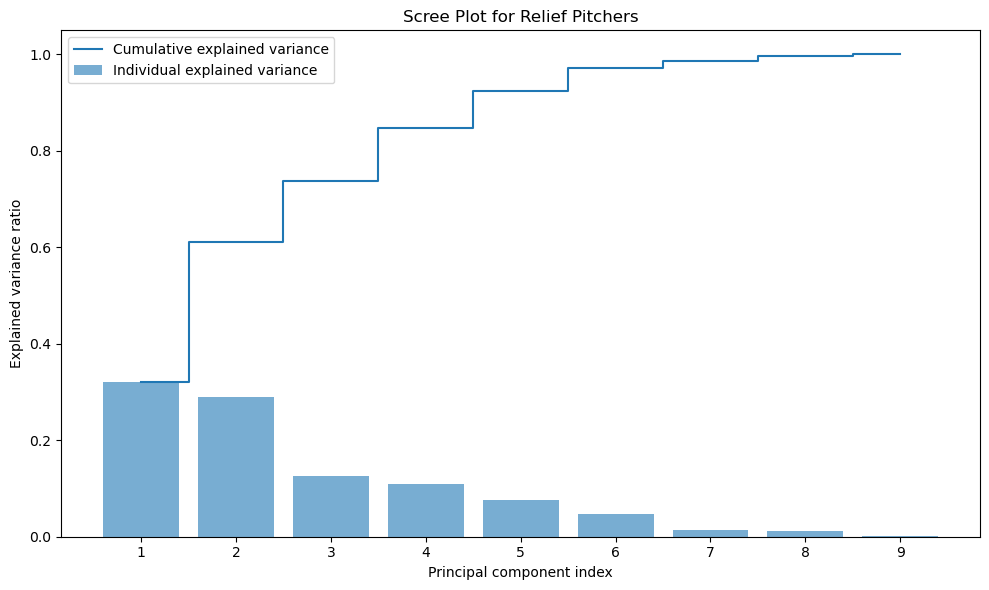

In [50]:


# 1. Î∂ÑÏÑùÌï† ÌîºÏ≤ò ÏÑ†ÌÉù Î∞è Ïä§ÏºÄÏùºÎßÅ
features = ['Ï¢ÖÌï© WAR','ERA*', 'Ïù¥ÎãùÏàò', 'Ìà¨Íµ¨Ïàò', 'K/9', 'BB/9','FIP','ÎÇòÏù¥','ÌîºÏû•ÌÉÄÏú®']
X_relief = df[features]
scaler_relief = StandardScaler()
X_relief_scaled = scaler_relief.fit_transform(X_relief)

# 2. PCA Ïã§Ìñâ (Î™®Îì† Ï£ºÏÑ±Î∂Ñ Í≥ÑÏÇ∞)
pca_relief = PCA()
pca_relief.fit(X_relief_scaled)

# 3. ÎàÑÏ†Å ÏÑ§Î™Ö Î∂ÑÏÇ∞ Í≥ÑÏÇ∞
explained_variance_relief = pca_relief.explained_variance_ratio_
cumulative_variance_relief = np.cumsum(explained_variance_relief)

print("--- [Íµ¨Ïõê Ìà¨Ïàò] Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ Î∞è ÎàÑÏ†Å Î∂ÑÏÇ∞ ---")
pc_df = pd.DataFrame({
    'Explained Variance': explained_variance_relief,
    'Cumulative Variance': cumulative_variance_relief
}, index=[f'PC{i+1}' for i in range(len(explained_variance_relief))])
print(pc_df)


# 4. Ïä§ÌÅ¨Î¶¨ Í∑∏Î¶º(Scree Plot) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_relief) + 1), explained_variance_relief, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(explained_variance_relief) + 1), cumulative_variance_relief, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot for Relief Pitchers')
plt.xticks(range(1, len(explained_variance_relief) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ÏõêÎ≥∏ 9Í∞ú ÌîºÏ≤òÍ∞Ä 4Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÏäµÎãàÎã§.
Í∞Å Ï£ºÏÑ±Î∂ÑÏùò ÏÑ§Î™Ö Î∂ÑÏÇ∞(Ï†ïÎ≥¥Îüâ): [0.32082322 0.29046197 0.12689002 0.10924345]
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: 0.85


C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


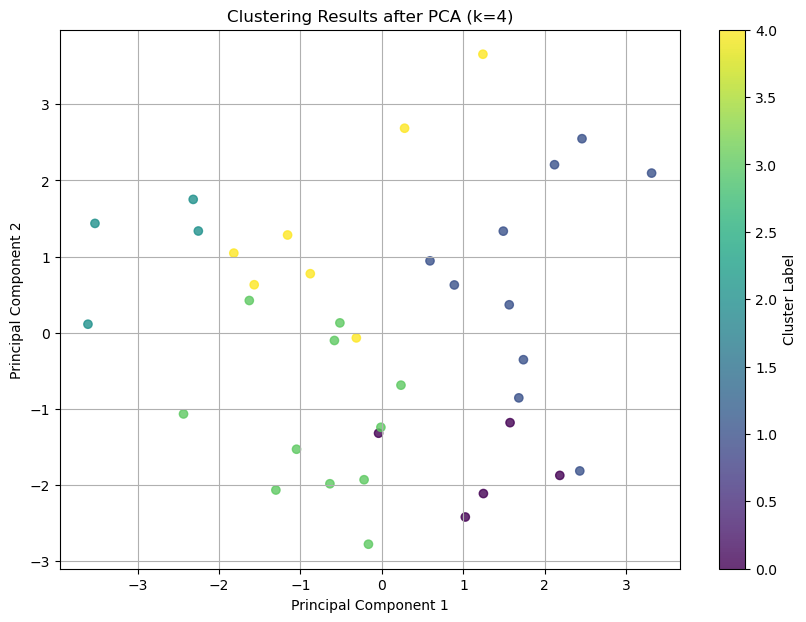

In [36]:

from sklearn.decomposition import PCA




# 1. PCA Î≥ÄÌôò
# Ï£ºÏÑ±Î∂Ñ Í∞úÏàòÎ•º 4Í∞úÎ°ú ÏÑ§Ï†ï(>87%)
n_components = 4
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"ÏõêÎ≥∏ {X_scaled.shape[1]}Í∞ú ÌîºÏ≤òÍ∞Ä {pca.n_components_}Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÏäµÎãàÎã§.")
print(f"Í∞Å Ï£ºÏÑ±Î∂ÑÏùò ÏÑ§Î™Ö Î∂ÑÏÇ∞(Ï†ïÎ≥¥Îüâ): {pca.explained_variance_ratio_}")
print(f"Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: {sum(pca.explained_variance_ratio_):.2f}")


# 2. PCA Îç∞Ïù¥ÌÑ∞Î°ú K-ÌèâÍ∑† Íµ∞ÏßëÎ∂ÑÏÑù Ïã§Ìñâ
# k=5Î°ú ÏÑ§Ï†ïÌïòÏó¨ Íµ∞ÏßëÌôî
n_clusters = 5
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
df['pca_cluster'] = kmeans_pca.fit_predict(X_pca)


# 3. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['pca_cluster'], cmap='viridis', alpha=0.8)

# Í∞Å Ï†êÏóê ÏÑ†Ïàò Ïù¥Î¶Ñ ÌëúÏãú (ÏÑ†ÌÉù ÏÇ¨Ìï≠ - Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏúºÎ©¥ ÏßÄÏ†ÄÎ∂ÑÌï¥ Î≥¥Ïùº Ïàò ÏûàÏùå)
# for i, name in enumerate(df_filtered['ÏÑ†ÏàòÎ™Ö']):
#     plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9)

plt.title('Clustering Results after PCA (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

--- Ï£ºÏÑ±Î∂Ñ Ï†ÅÏû¨(PCA Loadings) ---
             PC1       PC2       PC3       PC4
Ï¢ÖÌï© WAR -0.433400  0.250180  0.360165  0.243308
ERA*    0.477918  0.008465 -0.427216 -0.208503
Ïù¥ÎãùÏàò    -0.008415  0.593835  0.032047  0.132009
Ìà¨Íµ¨Ïàò     0.088011  0.568212 -0.050166  0.185468
K/9    -0.261802 -0.217004 -0.445478  0.388250
BB/9    0.168797 -0.355826  0.095038  0.690410
ÌîºÏû•ÌÉÄÏú®    0.477435 -0.002267  0.342457  0.342598
FIP     0.086109 -0.242394  0.598534 -0.307922
ÎÇòÏù¥      0.493509  0.171376  0.034944  0.076871


C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  fig.ca

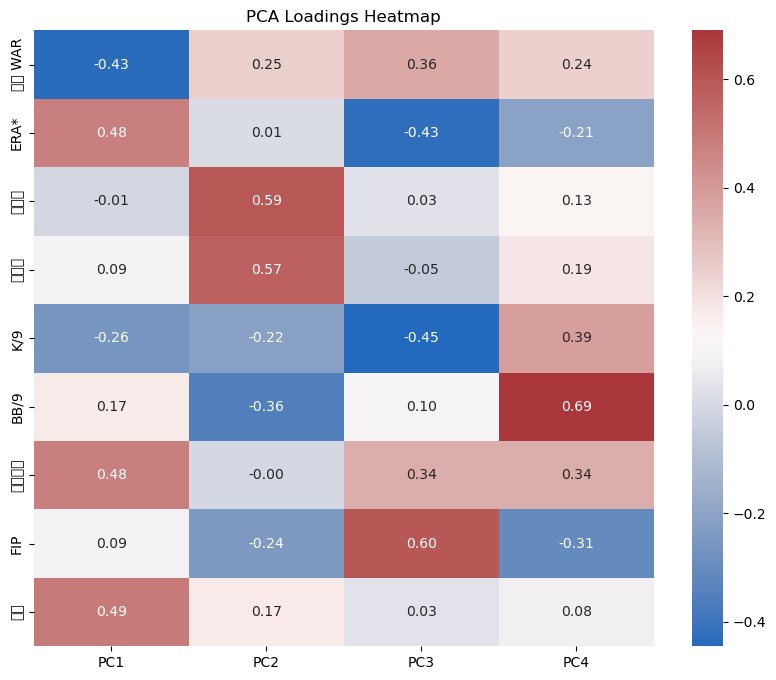

In [10]:
# 1. Ï£ºÏÑ±Î∂Ñ Ï†ÅÏû¨(PCA Loadings)Î•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
# pca.components_ ÏÜçÏÑ±Ïóê Í∞Å Ï£ºÏÑ±Î∂ÑÏùò Ï†ÅÏû¨Í∞íÏù¥ Îì§Ïñ¥ÏûàÏäµÎãàÎã§.
loadings_df = pd.DataFrame(
    data=pca.components_.T,  # TÎ•º Î∂ôÏó¨ ÌñâÍ≥º Ïó¥ÏùÑ Î∞îÍøâÎãàÎã§.
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=features
)

print("--- Ï£ºÏÑ±Î∂Ñ Ï†ÅÏû¨(PCA Loadings) ---")
print(loadings_df)


# 2. ÌûàÌä∏Îßµ(Heatmap)ÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, fmt='.2f', cmap='vlag')
plt.title('PCA Loadings Heatmap')
plt.show()


In [11]:
#kmeans = KMeans(n_clusters=4, random_state=42)
#df['cluster_label'] = kmeans.fit_predict(X_scaled)

In [12]:
df['pca_cluster'].unique()

array([3, 0, 1, 4, 2])

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 0

In [13]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 0'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_0_players = df[df['pca_cluster'] == 0]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_0_players[['ÏÑ†ÏàòÎ™Ö'] + features])

# ÎßåÏïΩ ÏÑ†Ïàò Ïù¥Î¶ÑÎßå Î≥¥Í≥† Ïã∂Îã§Î©¥
# print(cluster_0_players['player_name'])

        ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*    Ïù¥ÎãùÏàò         Ìà¨Íµ¨Ïàò        K/9      BB/9   ÌîºÏû•ÌÉÄÏú®  \
1   Í≥†Ìö®Ï§Ä(1Ï∞®)  0.2525  5.435005  45.05  862.750000  10.434783  5.652174  0.397   
11  ÎßàÏ†ïÍ∏∏(1Ï∞®)  0.7800  4.515966  44.70  816.333333   8.005391  5.579515  0.401   
12  Î∞ïÏ†ïÏßÑ(1Ï∞®)  1.1825  3.899745  58.85  958.500000   8.915094  6.367925  0.338   
13  Î¥âÏ§ëÍ∑º(1Ï∞®)  1.3500  3.316274  48.85  856.500000   4.986150  5.983380  0.425   
25  Ïù¥Ïû¨ÏòÅ(1Ï∞®)  0.3950  4.828862  46.30  789.500000   7.875000  5.250000  0.441   

     FIP    ÎÇòÏù¥  
1   3.81  34.5  
11  5.07  35.0  
12  4.62  35.5  
13  6.22  34.5  
25  5.61  33.5  


### ÌÅ¥Îü¨Ïä§ÌÑ∞ 1

In [14]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 1'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_1_players = df[df['pca_cluster'] == 1]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_1_players[['ÏÑ†ÏàòÎ™Ö'] + features])

# ÎßåÏïΩ ÏÑ†Ïàò Ïù¥Î¶ÑÎßå Î≥¥Í≥† Ïã∂Îã§Î©¥
# print(cluster_0_players['player_name'])

        ÏÑ†ÏàòÎ™Ö    Ï¢ÖÌï© WAR      ERA*        Ïù¥ÎãùÏàò          Ìà¨Íµ¨Ïàò       K/9      BB/9  \
3   ÍπÄÎåÄÏö∞(1Ï∞®)  0.485000  5.234375  49.075000   831.750000  6.890625  3.515625   
4   ÍπÄÏÇ¨Ïú®(1Ï∞®)  1.367500  4.537293  66.100000  1115.500000  8.078382  3.754741   
7   ÍπÄÏäπÌöå(1Ï∞®)  0.995000  4.721524  56.025000   946.000000  5.347826  3.000000   
10  ÎßàÏùºÏòÅ(1Ï∞®) -0.190000  6.396747  67.675000  1207.250000  4.558824  2.941176   
15  ÏÜ°ÏùÄÎ≤î(2Ï∞®)  0.806000  5.522672  73.660000  1298.400000  5.400000  3.900000   
16  Ïã¨ÏàòÏ∞Ω(1Ï∞®) -0.206667  6.486156  44.166667   796.666667  9.357045  3.939808   
24  Ïù¥Î≥¥Í∑º(1Ï∞®)  0.873333  5.160124  59.133333  1098.000000  7.967213  2.655738   
28  Ïù¥ÌòÑÏäπ(1Ï∞®)  0.476667  4.277567  52.800000   892.000000  6.451049  3.776224   
33   Ï£ºÍ∂å(1Ï∞®)  1.445000  4.168490  54.050000   836.250000  3.255319  4.021277   
35  Ï±ÑÎ≥ëÏö©(1Ï∞®)  0.917500  5.421400  73.825000  1318.000000  8.457831  3.253012   

     ÌîºÏû•ÌÉÄÏú®   FIP       

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 2

In [15]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 2'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_2_players = df[df['pca_cluster'] == 2]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_2_players[['ÏÑ†ÏàòÎ™Ö'] + features])

# ÎßåÏïΩ ÏÑ†Ïàò Ïù¥Î¶ÑÎßå Î≥¥Í≥† Ïã∂Îã§Î©¥
# print(cluster_2_players['player_name'])

        ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò      Ìà¨Íµ¨Ïàò        K/9      BB/9   ÌîºÏû•ÌÉÄÏú®  \
8   ÍπÄÏû¨Ïú§(1Ï∞®)  2.4650  3.134052  64.625  1028.50   8.282209  1.932515  0.290   
30  Ï†ïÏö∞Îûå(1Ï∞®)  1.9650  2.798319  59.500   972.00  11.571429  3.728571  0.291   
31  Ï†ïÏö∞Îûå(2Ï∞®)  2.3250  2.795699  62.775  1056.25   7.435456  2.633391  0.353   
32  Ï†ïÌòÑÏö±(1Ï∞®)  2.1325  3.157895  70.850  1109.00   6.945338  3.038585  0.332   

     FIP    ÎÇòÏù¥  
8   2.40  31.5  
30  2.58  28.5  
31  3.42  32.5  
32  2.75  32.5  


### ÌÅ¥Îü¨Ïä§ÌÑ∞ 3

In [16]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 3'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_3_players = df[df['pca_cluster'] == 3]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_3_players[['ÏÑ†ÏàòÎ™Ö'] + features])

# ÎßåÏïΩ ÏÑ†Ïàò Ïù¥Î¶ÑÎßå Î≥¥Í≥† Ïã∂Îã§Î©¥
# print(cluster_3_players['player_name'])

        ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò     Ìà¨Íµ¨Ïàò        K/9      BB/9   ÌîºÏû•ÌÉÄÏú®  \
0   Í∞ïÏòÅÏãù(1Ï∞®)  0.8750  4.161378  43.400  767.50   9.183673  4.821429  0.298   
2    Í∂åÌòÅ(1Ï∞®)  0.9775  3.896243  41.875  699.25  10.000000  2.894737  0.368   
6   ÍπÄÏÉÅÏàò(2Ï∞®)  0.7175  4.574468  42.300  757.75   6.230769  4.153846  0.302   
9   ÍπÄÏßÑÏÑ±(1Ï∞®)  0.5150  3.573113  46.075  760.25   8.379310  3.568966  0.337   
18  Ïò§ÏäπÌôò(2Ï∞®)  1.8425  2.876532  57.100  949.50   6.366559  2.459807  0.404   
19  Ïò§Ï£ºÏõê(1Ï∞®)  1.3875  4.527163  57.600  891.50   6.820702  1.663586  0.309   
21  ÏõêÏ¢ÖÌòÑ(1Ï∞®)  0.6150  3.975328  58.275  922.25   7.131537  2.567353  0.331   
22  Ïú†ÎèôÌõà(1Ï∞®)  1.6700  2.790979  49.050  719.25   7.676471  3.176471  0.349   
26  Ïù¥Ï†ïÌõà(1Ï∞®)  0.9275  4.037855  54.075  875.00   6.530612  4.489796  0.399   
29  ÏûÑÏ∞ΩÎØº(1Ï∞®)  0.3225  3.869077  37.650  682.25   7.792208  3.701299  0.357   
34  ÏßÑÌï¥Ïàò(1Ï∞®)  0.4275  4.697597  47.850

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 4

In [17]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 4'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_4_players = df[df['pca_cluster'] == 4]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_4_players[['ÏÑ†ÏàòÎ™Ö'] + features])


        ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò      Ìà¨Íµ¨Ïàò       K/9      BB/9   ÌîºÏû•ÌÉÄÏú®  \
5   ÍπÄÏÉÅÏàò(1Ï∞®)  1.0875  4.376997  55.900   996.00  8.454012  4.227006  0.372   
14  ÏÜêÏäπÎùΩ(1Ï∞®)  1.6525  3.210191  58.875   949.25  9.279869  2.356792  0.405   
17  ÏïàÏßÄÎßå(1Ï∞®)  2.1050  2.961702  68.600  1118.00  9.710145  4.927536  0.344   
20  Ïö∞Í∑úÎØº(2Ï∞®)  1.4275  4.708249  74.550  1208.50  5.625000  1.875000  0.416   
23  Ïù¥ÎèôÌòÑ(1Ï∞®)  1.3450  3.606218  61.600  1020.50  8.375635  3.350254  0.398   
27  Ïù¥ÌÉúÏñë(1Ï∞®)  0.8275  4.608000  84.350  1344.50  4.901786  2.330357  0.411   
36  ÌôçÍ±¥Ìù¨(1Ï∞®)  1.1525  3.438078  66.375  1145.75  9.117647  3.529412  0.386   

     FIP    ÎÇòÏù¥  
5   3.74  30.5  
14  3.40  31.5  
17  4.11  29.5  
20  3.76  33.5  
23  3.52  30.5  
27  4.76  30.5  
36  3.21  29.5  


### ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌîºÏ≥êÎì§Ïùò ÌèâÍ∑†Í∞í

In [18]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞Å featureÏùò ÌèâÍ∑†Í∞í ÌôïÏù∏
cluster_means = df.groupby('pca_cluster')[features].mean()
print(cluster_means)

               Ï¢ÖÌï© WAR      ERA*        Ïù¥ÎãùÏàò          Ìà¨Íµ¨Ïàò       K/9      BB/9  \
pca_cluster                                                                   
0            0.792000  4.399170  48.750000   856.716667  8.043283  5.766599   
1            0.696933  5.192635  59.651000  1033.981667  6.576411  3.475760   
2            2.221875  2.971491  64.437500  1041.437500  8.558608  2.833266   
3            0.934318  3.907249  48.659091   805.977273  7.659518  3.395857   
4            1.371071  3.844205  67.178571  1111.785714  7.923442  3.228051   

                 ÌîºÏû•ÌÉÄÏú®       FIP         ÎÇòÏù¥  
pca_cluster                                 
0            0.400400  5.066000  34.600000  
1            0.456200  4.759000  31.666667  
2            0.316500  2.787500  31.250000  
3            0.346727  3.528182  33.590909  
4            0.390286  3.785714  30.785714  


# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ ÏÑ†ÏàòÎì§Ïùò 1ÎÖÑÏ∞® ÏÑ±Ï†Å Î≥ÄÌôî ÌôïÏù∏

In [19]:
# 'Íµ¨Î∂Ñ' Ïª¨ÎüºÏù¥ 'FA 1ÎÖÑÏ∞®'Ïù∏ Î°úÏö∞Îì§Îßå ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
df_1 = df_pitcher[df_pitcher['Íµ¨Î∂Ñ'] == 'FA 1ÎÖÑÏ∞®'].copy()

# 1. df_pitcherÏóêÏÑú ÏÑ†ÏàòÎ≥Ñ ÌèâÍ∑† 'Íµ¨Ïõê Ïù¥Îãù' Í≥ÑÏÇ∞
relief_pitcher_stats = df_1.groupby('ÏÑ†ÏàòÎ™Ö')['Íµ¨Ïõê Ïù¥Îãù'].mean()

# 2. ÌèâÍ∑† 'Íµ¨Ïõê Ïù¥Îãù'Ïù¥ 28Î≥¥Îã§ ÌÅ∞ ÏÑ†ÏàòÎì§Ïùò Ïù¥Î¶ÑÎßå Ï∂îÏ∂ú
relief_pitcher_names = relief_pitcher_stats[relief_pitcher_stats > 28].index

print(f"Ï°∞Í±¥Ïóê ÎßûÎäî Ï¥ù {len(relief_pitcher_names)}Î™ÖÏùò Íµ¨Ïõê Ìà¨ÏàòÎ•º Ï∞æÏïòÏäµÎãàÎã§.")


# 3. Ïù¥Ï†ÑÏóê ÏßëÍ≥ÑÎêú ÏµúÏ¢Ö dfÏóêÏÑú Ìï¥Îãπ ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
df_1 = df_1[df_1['ÏÑ†ÏàòÎ™Ö'].isin(relief_pitcher_names)].copy()

print("\n--- Íµ¨Ïõê Ìà¨ÏàòÎßå ÌïÑÌÑ∞ÎßÅÎêú ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ---")
print(df_1['ÏÑ†ÏàòÎ™Ö'])


Ï°∞Í±¥Ïóê ÎßûÎäî Ï¥ù 35Î™ÖÏùò Íµ¨Ïõê Ìà¨ÏàòÎ•º Ï∞æÏïòÏäµÎãàÎã§.

--- Íµ¨Ïõê Ìà¨ÏàòÎßå ÌïÑÌÑ∞ÎßÅÎêú ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ---
4      Í∞ïÏòÅÏãù(1Ï∞®)
14     Í∂åÏò§Ï§Ä(1Ï∞®)
19      Í∂åÌòÅ(1Ï∞®)
33     ÍπÄÎåÄÏö∞(1Ï∞®)
43     ÍπÄÏÉÅÏàò(1Ï∞®)
48     ÍπÄÏäπÌöå(1Ï∞®)
53     ÍπÄÏû¨Ïú§(1Ï∞®)
58     ÍπÄÏßÑÏÑ±(1Ï∞®)
72     ÎßàÏ†ïÍ∏∏(1Ï∞®)
109    ÏÜ°ÏùÄÎ≤î(3Ï∞®)
113    Ïã¨ÏàòÏ∞Ω(1Ï∞®)
118    ÏïàÏòÅÎ™Ö(1Ï∞®)
123    ÏïàÏßÄÎßå(1Ï∞®)
137    Ïò§ÏäπÌôò(3Ï∞®)
151    Ïö∞Í∑úÎØº(3Ï∞®)
161    Ïú†ÎèôÌõà(1Ï∞®)
176    Ïú§Í∏∏ÌòÑ(1Ï∞®)
181    Ïú§ÏÑùÎØº(1Ï∞®)
195    Ïù¥ÎèôÌòÑ(1Ï∞®)
204    Ïù¥Ïö©Ï∞¨(1Ï∞®)
209    Ïù¥Ïû¨ÏòÅ(1Ï∞®)
219    Ïù¥Ï†ïÌõà(1Ï∞®)
224    Ïù¥ÌÉúÏñë(1Ï∞®)
228    Ïù¥ÌòÑÏäπ(1Ï∞®)
238    ÏûÑÏ∞ΩÎØº(1Ï∞®)
243    Ïû•ÎØºÏû¨(1Ï∞®)
248    Ïû•ÏãúÌôò(1Ï∞®)
259    Ï†ïÏö∞Îûå(2Ï∞®)
263    Ï†ïÏö∞Îûå(3Ï∞®)
273    Ï†ïÌòÑÏö±(1Ï∞®)
278     Ï£ºÍ∂å(1Ï∞®)
283    ÏßÑÌï¥Ïàò(1Ï∞®)
297    Ï±ÑÎ≥ëÏö©(1Ï∞®)
312    ÌôçÍ±¥Ìù¨(1Ï∞®)
332    ÍπÄÏÉÅÏàò(3Ï∞®)
Name: ÏÑ†ÏàòÎ™Ö, dtype: object


In [20]:
import re

# 1. Ï∞®ÏàòÎ•º Î≥ÄÍ≤ΩÌïòÎäî Ìï®Ïàò (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
def decrement_chasu_specific(name):
    # Ïù¥Î¶ÑÏóê '(Ïà´Ïûê)Ï∞®' Ìå®ÌÑ¥Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    match = re.search(r'\((\d+)Ï∞®\)', str(name)) # str()ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÏïàÏ†ÑÏÑ± ÌôïÎ≥¥
    
    if match:
        num = int(match.group(1))
        # Ï∞®ÏàòÍ∞Ä 1Î≥¥Îã§ ÌÅ¥ Í≤ΩÏö∞ (2Ï∞®, 3Ï∞® Îì±)ÏóêÎßå Î≥ÄÍ≤Ω
        if num > 1:
            new_num = num - 1
            new_suffix = f'({new_num}Ï∞®)'
            return name.replace(match.group(0), new_suffix)
            
    # Í∑∏ Ïô∏ Î™®Îì† Í≤ΩÏö∞ (1Ï∞®, Ï∞®Ïàò ÏóÜÎäî Ïù¥Î¶Ñ)Îäî ÏõêÎûò Ïù¥Î¶ÑÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÌôò
    return name

# 2. df_1['ÏÑ†ÏàòÎ™Ö'] Ïª¨ÎüºÏóê ÏúÑ Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Í∞í Î≥ÄÍ≤Ω
df_1['ÏÑ†ÏàòÎ™Ö'] = df_1['ÏÑ†ÏàòÎ™Ö'].apply(decrement_chasu_specific)


In [21]:
df_1

FAÎÖÑÎèÑ  Íµ¨Îã®Î™Ö      ÏÑ†ÏàòÎ™Ö ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò   Ìà¨      Íµ¨Î∂Ñ  FAÎì±Í∏â  ÌîåÎ†àÏù¥ÎÖÑÎèÑ  ÎÇòÏù¥  Í≤åÏûÑÏàò  ...  Íµ≠ÎåÄÏ∂úÏ†ÑÌöüÏàò  \
4    2015   Î°ØÎç∞  Í∞ïÏòÅÏãù(1Ï∞®)     RP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2014  33   52  ...       0   
14   2019   ÏÇºÏÑ±  Í∂åÏò§Ï§Ä(1Ï∞®)     RP  Ïö∞ÏÇ¨  FA 1ÎÖÑÏ∞®     A   2018  38   47  ...       0   
19   2016   ÌïúÌôî   Í∂åÌòÅ(1Ï∞®)     CP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2015  32   78  ...       1   
33   2025   ÏÇºÏÑ±  ÍπÄÎåÄÏö∞(1Ï∞®)     RP  Ïö∞Ïñ∏  FA 1ÎÖÑÏ∞®     C   2024  36   32  ...       0   
43   2022  SSG  ÍπÄÏÉÅÏàò(1Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2021  33   50  ...       4   
48   2019   ÎëêÏÇ∞  ÍπÄÏäπÌöå(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2018  37   55  ...       0   
53   2025   ÏÇºÏÑ±  ÍπÄÏû¨Ïú§(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     B   2024  34   65  ...       0   
58   2024   LG  ÍπÄÏßÑÏÑ±(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2023  38   80  ...       0   
72   2017   ÌÇ§ÏõÄ  ÎßàÏ†ïÍ∏∏(1Ï∞®)     RP  Ïö∞Ïñ∏  FA 1ÎÖÑÏ∞®     A   2016  37   61  ...       0   
109  2021   LG  ÏÜ°ÏùÄÎ≤î(2Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2020  36   56  ...       1   
113  2017   ÌïúÌôî  Ïã¨ÏàòÏ∞Ω(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2016  35   66  ...       0   
118  2019   ÌïúÌôî  ÏïàÏòÅÎ™Ö(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2018  34   53  ...       0   
123  2016   ÏÇºÏÑ±  ÏïàÏßÄÎßå(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2015  32   66  ...       2   
137  2025   ÏÇºÏÑ±  Ïò§ÏäπÌôò(2Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2024  42   58  ...       7   
151  2022   ÏÇºÏÑ±  Ïö∞Í∑úÎØº(2Ï∞®)     RP  Ïö∞Ïñ∏  FA 1ÎÖÑÏ∞®     B   2021  36   60  ...       3   
161  2014  KIA  Ïú†ÎèôÌõà(1Ï∞®)     RP  Ïö∞Ïñ∏  FA 1ÎÖÑÏ∞®     A   2013  36   49  ...       0   
176  2017   Î°ØÎç∞  Ïú§Í∏∏ÌòÑ(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2016  33   62  ...       0   
181  2016  KIA  Ïú§ÏÑùÎØº(1Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2015  29   51  ...       5   
195  2017   LG  Ïù¥ÎèôÌòÑ(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2016  33   46  ...       0   
204  2022   NC  Ïù¥Ïö©Ï∞¨(1Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2021  32   39  ...       3   
209  2016  SSG  Ïù¥Ïû¨ÏòÅ(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2015  36   26  ...       0   
219  2014   ÌÇ§ÏõÄ  Ïù¥Ï†ïÌõà(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2013  36   56  ...       0   
224  2024   ÌïúÌôî  Ïù¥ÌÉúÏñë(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2023  33   50  ...       2   
228  2018   ÎëêÏÇ∞  Ïù¥ÌòÑÏäπ(1Ï∞®)     CP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2017  34   57  ...       2   
238  2025   ÏÇºÏÑ±  ÏûÑÏ∞ΩÎØº(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2024  39   60  ...       2   
243  2025   ÌïúÌôî  Ïû•ÎØºÏû¨(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2024  34   26  ...       0   
248  2024   ÌïúÌôî  Ïû•ÏãúÌôò(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     C   2023  36   38  ...       1   
259  2017   ÌïúÌôî  Ï†ïÏö∞Îûå(1Ï∞®)     CP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2016  31   61  ...       2   
263  2021   ÌïúÌôî  Ï†ïÏö∞Îûå(2Ï∞®)     CP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2020  35   50  ...       2   
273  2014   LG  Ï†ïÌòÑÏö±(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2013  35   54  ...       1   
278  2025   KT   Ï£ºÍ∂å(1Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2024  29   48  ...       0   
283  2021   LG  ÏßÑÌï¥Ïàò(1Ï∞®)     RP  Ï¢åÌà¨  FA 1ÎÖÑÏ∞®     A   2020  34   76  ...       0   
297  2017  SSG  Ï±ÑÎ≥ëÏö©(1Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2016  34   68  ...       0   
312  2025   ÎëêÏÇ∞  ÌôçÍ±¥Ìù¨(1Ï∞®)     CP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®     A   2024  32   65  ...       0   
332  2025   Î°ØÎç∞  ÍπÄÏÉÅÏàò(2Ï∞®)     RP  Ïö∞Ìà¨  FA 1ÎÖÑÏ∞®  Îã§ÎÖÑÍ≥ÑÏïΩ   2024  36   74  ...       4   

     Íµ¨Ï¢Ö1  Íµ¨Ï¢Ö2  Íµ¨Ï¢Ö1 Íµ¨Ï¢ÖÍ∞ÄÏπò  WHIP            AAV  nÏ∞®        K/9      BB/9  \
4     Ìè¨Ïã¨   Ïä¨Îùº      -5.6  1.49   42500.000000   0   8.042553  4.978723   
14    Ìè¨Ïã¨   Ï≤∏Ï†ë       0.7  1.27   30000.000000   0  10.858469  3.132251   
19    Ìè¨Ïã¨   Ïä¨Îùº      16.2  1.58   80000.000000   0   7.071429  4.660714   
33    Ïä¨Îùº   Ìè¨Ïã¨     

In [37]:
fa_performance_columns = ['Ï¢ÖÌï© WAR', 'ERA*', 'Ïù¥ÎãùÏàò', 'Ìà¨Íµ¨Ïàò', 'K/9', 'BB/9', 'ÌîºÏû•ÌÉÄÏú®','FIP','ÎÇòÏù¥']
result_df = pd.DataFrame()

# 3. Í∞Å Íµ∞Ïßë(0~4)Ïóê ÎåÄÌï¥ Î∞òÎ≥µ ÏûëÏóÖ ÏàòÌñâ
# df_relief['pca_cluster'].unique()Î•º ÌÜµÌï¥ Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Íµ∞Ïßë Î≤àÌò∏Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
for cluster_num in sorted(df['pca_cluster'].unique()):
    
    # 3-1. ÌòÑÏû¨ Íµ∞ÏßëÏóê ÏÜçÌïú ÏÑ†ÏàòÎì§Ïùò Ïù¥Î¶ÑÎßå Í∞ÄÏ†∏Ïò§Í∏∞
    players_in_cluster = df[df['pca_cluster'] == cluster_num]['ÏÑ†ÏàòÎ™Ö']
    
    # 3-2. 'FA 1ÎÖÑÏ∞®' Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ ÏÑ†ÏàòÎì§Ïùò Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
    fa_stats_of_cluster = df_1[df_1['ÏÑ†ÏàòÎ™Ö'].isin(players_in_cluster)]
    
    # 3-3. ÌïÑÌÑ∞ÎßÅÎêú ÏÑ†ÏàòÎì§Ïùò ÌèâÍ∑† ÏÑ±Ï†Å Í≥ÑÏÇ∞
    mean_stats = fa_stats_of_cluster[fa_performance_columns].mean()
    
    # 3-4. Í≥ÑÏÇ∞Îêú ÌèâÍ∑† ÏÑ±Ï†ÅÏùÑ Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
    result_df[f'Cluster {cluster_num}'] = mean_stats

### ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ FA 1ÎÖÑÏ∞® ÏÑ±Ï†Å ÌèâÍ∑†

In [38]:
print(result_df.T)

             Ï¢ÖÌï© WAR      ERA*        Ïù¥ÎãùÏàò          Ìà¨Íµ¨Ïàò       K/9      BB/9  \
Cluster 0  0.955000  4.672414  47.100000   818.500000  7.476725  5.028277   
Cluster 1  0.772857  4.972787  64.371429  1071.857143  5.842678  3.625928   
Cluster 2  1.397500  3.478011  62.075000  1056.000000  7.781753  3.666128   
Cluster 3  1.241111  4.012851  64.722222  1120.444444  7.446174  4.120255   
Cluster 4  1.265000  3.716186  64.583333  1079.000000  7.594750  3.590606   

               ÌîºÏû•ÌÉÄÏú®       FIP         ÎÇòÏù¥  
Cluster 0  0.480000  5.525000  36.500000  
Cluster 1  0.481143  5.011429  34.428571  
Cluster 2  0.397500  4.337500  33.750000  
Cluster 3  0.395444  4.421111  36.222222  
Cluster 4  0.422833  4.295000  33.166667  


In [39]:
df_new_players = pd.read_csv('2026_FAÏòàÏ†ï_Ìà¨Ïàò.csv')

In [40]:
df_new = df_new_players.copy()

In [41]:


df_new['K/9'] = df_new['ÌÉàÏÇºÏßÑ']/df_new['Ïù¥ÎãùÏàò']*9
df_new['BB/9'] = df_new['ÏÇ¨ÏÇ¨Íµ¨']/df_new['Ïù¥ÎãùÏàò']*9



era_stats = df_new.groupby('ÏÑ†ÏàòÎ™Ö').agg({
    'ÏûêÏ±ÖÏ†ê': 'sum',
    'Ïù¥ÎãùÏàò': 'sum'
}).reset_index()

# ERA* Í≥ÑÏÇ∞
era_stats['ERA*'] = (era_stats['ÏûêÏ±ÖÏ†ê'] / era_stats['Ïù¥ÎãùÏàò']) * 9

# ERA*Î•º df_trainÏóê Î≥ëÌï©
df_new = pd.merge(df_new, era_stats[['ÏÑ†ÏàòÎ™Ö', 'ERA*']], on='ÏÑ†ÏàòÎ™Ö', how='left')

df_new = df_new[df_new['ÏÑ†ÏàòÎ™Ö'] != 'ÏñëÌòÑÏ¢Ö']
df_new = df_new[df_new['ÏÑ†ÏàòÎ™Ö'] != 'ÏµúÏõêÏ§Ä']

In [42]:
# 2. ÏÑ±Í≥º ÏßÄÌëú ÌèâÍ∑† Ï≤òÎ¶¨
performance_cols_new = ['Ï¢ÖÌï© WAR', 'ERA*', 'Ïù¥ÎãùÏàò', 'Ìà¨Íµ¨Ïàò','ÏÑ†Î∞ú Ïù¥Îãù','Íµ¨Ïõê Ïù¥Îãù','ÎÇòÏù¥']  # ÌèâÍ∑† ÎÇº Ïª¨ÎüºÎì§Î°ú ÏàòÏ†ï

performance_avg_new = df_new.groupby('ÏÑ†ÏàòÎ™Ö')[performance_cols_new].mean().reset_index()

# 3. ÌèâÍ∑† ÎÇ¥ÏßÄ ÏïäÎäî Ïª¨Îüº(Î¨∏ÏûêÏó¥ Îì±) Ï≤òÎ¶¨ ‚ÜíÎßàÏßÄÎßâ Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
extra_cols_new = ['K/9', 'BB/9', 'FIP','ÌîºÏû•ÌÉÄÏú®' ]  # Ï∂îÍ∞ÄÌïòÍ≥† Ïã∂ÏùÄ Ïª¨Îüº
extra_info_new = df_new.groupby('ÏÑ†ÏàòÎ™Ö')[extra_cols].last().reset_index()

# 4. Î≥ëÌï©
df_new = (
    performance_avg_new
    .merge(extra_info_new, on='ÏÑ†ÏàòÎ™Ö', how='left')
)

In [43]:
df_new

ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò      Ìà¨Íµ¨Ïàò   ÏÑ†Î∞ú Ïù¥Îãù   Íµ¨Ïõê Ïù¥Îãù    ÎÇòÏù¥        K/9  \
0   ÍπÄÎ≤îÏàò  0.4700  4.073881  48.050   850.50   0.000  48.050  28.5   9.568106   
1   ÍπÄÏÉÅÏàò  0.5475  4.596200  42.100   720.25   0.000  42.100  35.5   6.903409   
2   ÍπÄÌÉúÌõà  0.5325  4.868421  51.300   712.00   0.000  51.300  31.5   9.957447   
3   ÏÑúÏßÑÏö©  0.9875  3.873539  47.050   808.50   0.000  47.050  31.5   0.000000   
4   Ïã¨Ï∞ΩÎØº  0.0575  6.380597  20.100   416.75   0.000  20.100  28.5  14.516129   
5   Ïù¥ÏäπÌòÑ  0.5850  4.473823  47.275   851.25   0.000  47.275  32.5   6.157895   
6   Ïù¥ÏòÅÌïò  0.4050  4.524941  63.150  1160.50  25.275  37.875  26.5  10.577689   
7   Ïù¥Ï§ÄÏòÅ  0.5700  3.730909  34.375   609.50   0.000  34.375  31.5   8.922414   
8   Ïû•ÌïÑÏ§Ä -0.3175  7.446043  20.850   408.50   2.550  18.125  34.5   0.000000   
9   Ï°∞ÏÉÅÏö∞  0.5525  3.394343  45.075   803.25   0.000  45.075  28.5   9.418605   
10  ÏßÑÌï¥Ïàò  0.5700  3.379310  32.625   552.00   0.000  32.625  36.5   7.279412   
11  ÏµúÎèôÌôò  0.2000  4.980514  32.075   540.00   0.000  32.075  34.5   5.070423   
12  ÏµúÏÑ±Ìõà  0.0950  4.131737  12.525   209.75   0.000  12.525  34.5   9.000000   
13  ÌôçÍ±¥Ìù¨  0.8175  3.343949  47.100   815.25   0.000  47.100  31.5   8.852459   

         BB/9    FIP   ÌîºÏû•ÌÉÄÏú®  
0    4.784053   2.90  0.241  
1    5.369318   4.99  0.463  
2    4.595745   3.91  0.418  
3   24.545455  11.05  0.250  
4   17.419355   5.68  0.167  
5    3.315789   5.65  0.513  
6    5.916335   3.72  0.340  
7    3.103448   4.88  0.558  
8    0.000000   4.20  1.000  
9    6.069767   4.35  0.423  
10   4.301471   5.82  0.474  
11   6.338028   7.91  0.667  
12   9.000000   4.55  0.000  
13  10.327869   8.77  0.560

In [44]:
new_X = df_new[features]

# 1. Í∏∞Ï°¥ Ïä§ÏºÄÏùºÎü¨Î°ú Î≥ÄÌôò
new_X_scaled = scaler_relief.transform(new_X)

# 2. Í∏∞Ï°¥ PCAÎ°ú Î≥ÄÌôò
new_X_pca = pca.transform(new_X_scaled)

# 3. Í∏∞Ï°¥ KMeansÎ°ú ÏòàÏ∏°
new_clusters = kmeans_pca.predict(new_X_pca)

# 4. Í≤∞Í≥ºÎ•º ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_new['pca_cluster_new'] = new_clusters

# Í≤∞Í≥º ÌôïÏù∏
print(df_new.head())

   ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*    Ïù¥ÎãùÏàò     Ìà¨Íµ¨Ïàò  ÏÑ†Î∞ú Ïù¥Îãù  Íµ¨Ïõê Ïù¥Îãù    ÎÇòÏù¥        K/9  \
0  ÍπÄÎ≤îÏàò  0.4700  4.073881  48.05  850.50    0.0  48.05  28.5   9.568106   
1  ÍπÄÏÉÅÏàò  0.5475  4.596200  42.10  720.25    0.0  42.10  35.5   6.903409   
2  ÍπÄÌÉúÌõà  0.5325  4.868421  51.30  712.00    0.0  51.30  31.5   9.957447   
3  ÏÑúÏßÑÏö©  0.9875  3.873539  47.05  808.50    0.0  47.05  31.5   0.000000   
4  Ïã¨Ï∞ΩÎØº  0.0575  6.380597  20.10  416.75    0.0  20.10  28.5  14.516129   

        BB/9    FIP   ÌîºÏû•ÌÉÄÏú®  pca_cluster_new  
0   4.784053   2.90  0.241                3  
1   5.369318   4.99  0.463                0  
2   4.595745   3.91  0.418                0  
3  24.545455  11.05  0.250                0  
4  17.419355   5.68  0.167                0  


In [45]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 0'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_0_players_new = df_new[df_new['pca_cluster_new'] == 0]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_0_players_new[['ÏÑ†ÏàòÎ™Ö'] + features])

    ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò     Ìà¨Íµ¨Ïàò        K/9       BB/9   ÌîºÏû•ÌÉÄÏú®    FIP  \
1   ÍπÄÏÉÅÏàò  0.5475  4.596200  42.100  720.25   6.903409   5.369318  0.463   4.99   
2   ÍπÄÌÉúÌõà  0.5325  4.868421  51.300  712.00   9.957447   4.595745  0.418   3.91   
3   ÏÑúÏßÑÏö©  0.9875  3.873539  47.050  808.50   0.000000  24.545455  0.250  11.05   
4   Ïã¨Ï∞ΩÎØº  0.0575  6.380597  20.100  416.75  14.516129  17.419355  0.167   5.68   
5   Ïù¥ÏäπÌòÑ  0.5850  4.473823  47.275  851.25   6.157895   3.315789  0.513   5.65   
7   Ïù¥Ï§ÄÏòÅ  0.5700  3.730909  34.375  609.50   8.922414   3.103448  0.558   4.88   
9   Ï°∞ÏÉÅÏö∞  0.5525  3.394343  45.075  803.25   9.418605   6.069767  0.423   4.35   
10  ÏßÑÌï¥Ïàò  0.5700  3.379310  32.625  552.00   7.279412   4.301471  0.474   5.82   
11  ÏµúÎèôÌôò  0.2000  4.980514  32.075  540.00   5.070423   6.338028  0.667   7.91   
13  ÌôçÍ±¥Ìù¨  0.8175  3.343949  47.100  815.25   8.852459  10.327869  0.560   8.77   

      ÎÇòÏù¥  
1  

In [46]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 1'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_1_players_new = df_new[df_new['pca_cluster_new'] == 1]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_1_players_new[['ÏÑ†ÏàòÎ™Ö'] + features])

   ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*    Ïù¥ÎãùÏàò    Ìà¨Íµ¨Ïàò  K/9  BB/9  ÌîºÏû•ÌÉÄÏú®  FIP    ÎÇòÏù¥
8  Ïû•ÌïÑÏ§Ä -0.3175  7.446043  20.85  408.5  0.0   0.0   1.0  4.2  34.5


In [47]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 2'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_2_players_new = df_new[df_new['pca_cluster_new'] == 2]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_2_players_new[['ÏÑ†ÏàòÎ™Ö'] + features])



Empty DataFrame
Columns: [ÏÑ†ÏàòÎ™Ö, Ï¢ÖÌï© WAR, ERA*, Ïù¥ÎãùÏàò, Ìà¨Íµ¨Ïàò, K/9, BB/9, ÌîºÏû•ÌÉÄÏú®, FIP, ÎÇòÏù¥]
Index: []


In [48]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 3'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_3_players_new = df_new[df_new['pca_cluster_new'] == 3]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_3_players_new[['ÏÑ†ÏàòÎ™Ö'] + features])

    ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*     Ïù¥ÎãùÏàò     Ìà¨Íµ¨Ïàò       K/9      BB/9   ÌîºÏû•ÌÉÄÏú®   FIP  \
0   ÍπÄÎ≤îÏàò   0.470  4.073881  48.050  850.50  9.568106  4.784053  0.241  2.90   
12  ÏµúÏÑ±Ìõà   0.095  4.131737  12.525  209.75  9.000000  9.000000  0.000  4.55   

      ÎÇòÏù¥  
0   28.5  
12  34.5  


In [49]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 4'Ïóê ÏÜçÌïú ÏÑ†ÏàòÎì§Îßå ÌïÑÌÑ∞ÎßÅ
cluster_4_players_new = df_new[df_new['pca_cluster_new'] == 4]

# ÏÑ†Ïàò Ïù¥Î¶Ñ(player_name)Í≥º Ï£ºÏöî ÌäπÏßï(features)ÏùÑ Ìï®Íªò Ï∂úÎ†•
print(cluster_4_players_new[['ÏÑ†ÏàòÎ™Ö'] + features])


   ÏÑ†ÏàòÎ™Ö  Ï¢ÖÌï© WAR      ERA*    Ïù¥ÎãùÏàò     Ìà¨Íµ¨Ïàò        K/9      BB/9  ÌîºÏû•ÌÉÄÏú®   FIP    ÎÇòÏù¥
6  Ïù¥ÏòÅÌïò   0.405  4.524941  63.15  1160.5  10.577689  5.916335  0.34  3.72  26.5
